# Notebook for quick analyisis of atomic coordinates using a SOAP based metric

In [41]:
%reset
import numpy as np
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [42]:
import asaplib

## load structures

In [43]:
from asaplib.data import ASAPXYZ

In [44]:
asapxyz = ASAPXYZ('P-20GPa/result-complete/combined.xyz')

load xyz file:  P-20GPa/result-complete/combined.xyz , a total of  4690 frames , a total of  91335 atoms , with elements:  [8, 22] .


In [48]:
# load the tags
tags = np.loadtxt("P-20GPa/result-complete/ranking-complete", dtype="str")
#  import some reference order parameter for the structures
enthalpy = np.array(tags[:,3],float)

# compute SOAP descriptors

In [49]:
# specify the parameters
soap_spec = {'soap1': {'type': 'SOAP',
                       'cutoff': 4.0,
                       'n': 6,
                       'l': 6,
                       'atom_gaussian_width': 0.5,
                       'crossover': False,
                       'rbf': 'gto'
                      }
            }

reducer_spec = {'reducer1': {
                          'reducer_type': 'average', # [average], [sum], [moment_average], [moment_sum]
                          'element_wise': False}
               }

desc_spec = {'avgsoap': {
                  'atomic_descriptor': soap_spec,
                  'reducer_function': reducer_spec}
            }

In [50]:
# compute
asapxyz.compute_global_descriptors(desc_spec_dict=desc_spec,
                                    sbs=[],
                                    keep_atomic=False,
                                    tag='tio2',
                                    n_process=4)

Using SOAP Descriptors ...
Using Atomic_2_Global_Average reducer ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 4523 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 4690 out of 4690 | elapsed:    9.7s finished


In [23]:
#asapxyz.write('outout')

# Build a kernel Matrix

In [51]:
reduce_dict = {}
reduce_dict['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 10,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'linear'}}}}

# kernal PCA on environmental similarity

In [52]:
from asaplib.reducedim import Dimension_Reducers
dreducer = Dimension_Reducers(reduce_dict)

Using kernel PCA (sparsified) ...


In [53]:
dm = asapxyz.fetch_computed_descriptors(['avgsoap'])

In [54]:
proj = dreducer.fit_transform(dm)

Not using any sparsification


# Plot the result

In [55]:
from asaplib.plot import Plotters

Using scatter plot ...


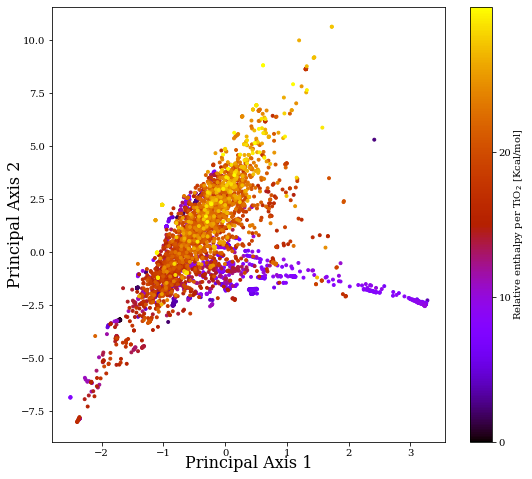

In [58]:
fig_spec = { 'outfile': None,
                'show': False,
                'title': None,
                'size': [8*1.1, 8],
                'cmap': 'gnuplot',
                    'components':{
                    'first_p': {'type': 'scatter', 'clabel': 'Relative enthalpy per TiO$_2$ [Kcal/mol]',
                                'vmin':None, 'vmax': None}
                    #'second_p': {"type": 'annotate', 'adtext': False} 
                    }
                   }
    
asap_plot = Plotters(fig_spec)

plotcolor = enthalpy[:]
asap_plot.plot(proj[:, [1,0]], plotcolor)